# Colección de SMS Spam

---

Este es un corpus de texto de más de 5,500 mensajes SMS en inglés con aproximadamente el 13% etiquetados como spam. 

El archivo de texto contiene un mensaje por línea con dos columnas: la etiqueta ("ham" o "spam") y el texto crudo del mensaje. Los mensajes etiquetados como "ham" son mensajes no spam que se pueden considerar legítimos.


Fuente del conjunto de datos. Este corpus fue creado por Tiago A. Almeida y José María Gómez Hidalgo.

> Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contribuciones al Estudio del Filtrado de SMS Spam: Nueva Colección y Resultados. Actas del Simposio ACM de 2011 sobre Ingeniería de Documentos (DOCENG'11), Mountain View, CA, EE.UU., 2011.

>Gómez Hidalgo, J.M., Almeida, T.A., Yamakami, A. Sobre la Validez de una Nueva Colección de SMS Spam. Actas de la 11ª Conferencia Internacional IEEE sobre Aprendizaje Automático y Aplicaciones (ICMLA'12), Boca Raton, FL, EE.UU., 2012.

> Almeida, T.A., Gómez Hidalgo, J.M., Silva, T.P. Hacia el Filtrado de SMS Spam: Resultados bajo un Nuevo Conjunto de Datos. Revista Internacional de Ciencia de la Seguridad de la Información (IJISS), 2(1), 1-18, 2013.

## Objetivos

- 🗺️ Explorar: ¿Cuáles son las palabras más comunes en los mensajes de spam frente a los mensajes normales?

- 📊 Visualizar: Crea una nube de palabras que visualice las palabras más comunes en el conjunto de datos.

- 🔎 Analizar: ¿Qué palabra tiene más probabilidades de indicar que un mensaje es spam?

## Contexto

Una empresa de telecomunicaciones que está lanzando una nueva aplicación de mensajería. Desafortunadamente, los filtros de spam anteriores que han utilizado están desactualizados y ya no son efectivos. Te han preguntado si puedes usar los nuevos datos que han proporcionado para distinguir con precisión entre mensajes de spam y mensajes regulares. También te han dicho que es esencial que __los mensajes regulares rara vez, o nunca, se categorizen como spam__.

> prepara un informe que sea accesible para una audiencia amplia. Debe esbozar tu motivación, pasos, hallazgos y conclusiones.


## Contenido del procesos de analisis 

- Exploracion Inicial
  1. Obtencion de los datos.
  2. Visualizaciones exploratorias.
  3. Aplicacion de estadistica basica.
- Preprocesamiento de Datos.
  1. Limpieza de Datos.
  2. Tokenizacion.
  3. Eliminacion de stopwords.
  4. Lematizacion/Steamming.
- Alisis Exploratorio de Datos (EDA). 
  1. Palabras Más Comunes.
  2. Visualización de datos.
  3. Análisis de Palabras Clave.
- Modelo de ML.
  1. Seleccion.
  2. Entrenamineto.
  3. Evaluacion.


## Metodologia

### Datos

| variable | clase  | descripción                                                     |
| -------- | ------ | --------------------------------------------------------------- |
| 0        | String | Cadena de texto que identifica si el mensaje es 'ham' o 'spam'. |
| 1        | String | Cadena de texto que representa el mensaje.                      |


### Tools

- Python: latest
- Conda: latest
- Pandas: latest
- Plotly: latest
- Nltk: latest
- Wordcloud: latest
- Sklearn

In [1]:
# Librerias de uso general
import pandas as pd 
from collections import Counter
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px 

# Librerias para procesar texto.
from nltk.corpus import stopwords
#import nltk
# Algoritmo Porter stemme
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud

# Eliminacion de caracteres especiales
import re

# ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


## Exploracion Inicial
---

In [53]:
# definicion del dataframe
spam = pd.read_csv('SMSSpamCollection.csv', header=None)

# Rename de las columnas {0, 1}
spam = spam.rename(columns={0: 'TYPE', 1: 'MSG'})

spam.head(10)

,TYPE,MSG
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### ¿Existe una relacion en el tamaño de los mensajes y su clasificacion?

Estamos analizando la longitud de los mensajes (en número de caracteres) para observar si existe un patrón distintivo entre mensajes de spam y mensajes legítimos (ham).

Esto nos puede ayudar a entender e identificar diferencias en el tamaño de los mensajes puede ayudar a entender cómo los mensajes de spam se diseñan para llamar la atención o contener más información engañosa.

In [60]:
# Calculo del tamaño de cada mensaje
spam.loc[:, 'MSG_LEN'] = spam.apply(
    lambda row: len(row['MSG']),
    axis=1
)


spam.query("MSG_LEN>=100 and MSG_LEN<= 300")['TYPE'].value_counts()

TYPE
ham     1060
spam     673
Name: count, dtype: int64

In [61]:
spam_lengths = spam[spam["TYPE"] == "spam"].query("MSG_LEN>=100 and MSG_LEN<=300")["MSG_LEN"]
ham_lengths = spam[spam["TYPE"] == "ham"].query("MSG_LEN<=300")["MSG_LEN"]
labels = ['SPAM LENGTH', 'HAM LENGTH']
colors = ['#A56CC1', '#A6ACEC']

# Crear los datos para las distribuciones
fig = ff.create_distplot(
    [spam_lengths, 
    ham_lengths],  # Listas de valores
    group_labels=labels,
    colors=colors,  
    bin_size=10,
    show_rug=False
)

# Configuración adicional del diseño
fig.update_layout(
    title_text="Distribución de Longitud de Mensajes Spam y Ham",
    xaxis_title="Message Length",
    yaxis_title="Density",
    legend_title="Category"
)

fig.show()

Como se meustra en el grafico solo se visualizan mensajes de spam y ham entre el rango de 100 a 300. Esto nos ayuda a centrarnos en la dsitrubucion mas importante sin incluir valores extremos. Esta grafica nos ayuda a visualizar lo siguiente.

- La curva de spam (SPAM LENGTH) presenta un pico significativo entre 150 y 200 caracteres, lo que sugiere que los mensajes de spam tienden a ser más largos y suelen incluir más contenido.
- la curva de ham (HAM LENGTH) está más concentrada en longitudes cortas, particularmente por debajo de 50 caracteres, lo que indica que los mensajes legítimos tienden a ser más breves.
- Aunque existe cierta superposición entre las longitudes de los mensajes spam y ham, se nota una clara tendencia de separación
- !! Este comportamiento puede ser clave para modelos de clasificación, ya que la longitud de un mensaje podría ser una característica relevante para distinguir entre ambas categorías.

### ¿Cuantos registros tenemos por etiqueta (ham, spam)?

Esta informacion nos puede ayudar para identificar si existe un balance adecuado entre ambas categorías o si el dataset está desequilibrado, lo cual podría afectar el rendimiento de modelos de clasificación.

In [64]:
# Calculo del porcentaje total de registros de mensajes de spam y no spam
spam_slice = round(spam['TYPE'].value_counts() / spam.shape[0], 4) * 100

# Creacion de un 
porcion = pd.DataFrame(spam_slice)
spam_slice = spam_slice.reset_index()


fig = px.pie(
    spam_slice, 
    values='count',
    names='TYPE',
    title="Ham vs Spam"
    )

fig.update_layout(uniformtext_minsize=14)

fig.show()

El grafico de pastel (Pie Chart) generado podemos observar que la mayoría de los mensajes pertenecen a la categoría ham, con un 86.6% del total, mientras que los mensajes de spam constituyen solo el 13.4%. Eso nos indica que nuestro **dataset** se encutra desequilibrado esto trae consigo ciertos problemas como por ejemplo:

- Podria sesgar un modelo de clasificación, ya que el modelo podría aprender a favorecer la categoría predominante. En este caso, si los mensajes ham son mayoría, el modelo podría clasificar incorrectamente los mensajes spam.

!!! Esta información nos permite tomar decisiones informadas, como aplicar técnicas de balanceo de datos (submuestreo o sobremuestreo) para mejorar la calidad del análisis o el entrenamiento del modelo.

## Preprocesamiento de Datos
---

El preprocesamiento es una etapa fundamental en el análisis de mensajes de texto, ya que permite transformar el contenido textual en una forma que los modelos de aprendizaje automático puedan interpretar y analizar de manera efectiva. En este caso, trabajamos con mensajes de spam y ham, por lo que es crucial limpiar y estructurar los datos textuales para garantizar un análisis satisfactorio.

### Eliminacion de caracteres especiales

In [68]:
# Eliminacion de caracteres especiales (@, #, %, $, etc.).
# Definir el patrón de expresión regular
pattern = r'[^a-zA-Z0-9\s]'

# Aplicar la limpieza a cada mensaje en la columna 'MSG'
spam.loc[:, 'CLEAN_MSG'] = spam['MSG'].apply(lambda msg: re.sub(pattern, "", msg))

spam.head(5)

,TYPE,MSG,MSG_LEN,CLEAN_MSG
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...


### Elminacion de stopwords (English)

Podemos realizar esto mediante la librerria "nltk" para anlisis de texto.

In [69]:
# Eliminacion de de palabras que no aportan informacion como [I, la, will, etc.] este depende el idioma
# en ingles ocupamos descargar el paquete

# Si no esta descargado el paquete de palabras
#nltk.download('stopwords')
# 
# Recurso
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/#removing-stop-words-with-sklearn
stop_words = set(stopwords.words('english'))


spam['CLEAN_MSG'] = spam['CLEAN_MSG'].apply(
    lambda msg: ' '.join([word for word in msg.split() if word.lower() not in stop_words])
    )

spam.head(5)

,TYPE,MSG,MSG_LEN,CLEAN_MSG
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though


### Lematizacion

Este proceso implica reducir las palabras a su forma base o raíz. Por ejemplo, convertimos "corriendo" a "correr" para evitar redundancia y simplificar el procesamiento.

para comprender mejor como se realiza podemos consultas en [datacamp](https://www.datacamp.com/es/tutorial/stemming-lemmatization-python). Para comprender mejor esto.

Mediante el uso del algoritmo "PorterStemmer" realizamos la lemmatizacion para palabras en ingles.

In [72]:
# https://www.datacamp.com/es/tutorial/stemming-lemmatization-python

# Descargar el modelo de tokenizacion "punkt".
# nltk.download("punkt")

# Initialize Python porter stemmer
ps = PorterStemmer()

spam['CLEAN_MSG'] = spam['CLEAN_MSG'].apply(
    lambda msg: ' '.join(
        [ps.stem(word) for word in msg.split()]
        )
    )

spam.head(5)

,TYPE,MSG,MSG_LEN,CLEAN_MSG
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goe usf live around though


## Análisis Exploratorio de Datos (EDA)
---


### ¿Cuales son las palabras mas comunes en los mensajes de spam y no spam?

In [74]:
# Agrupacion de mensajes por su tipo.
ham_messages  = spam[spam['TYPE'] == 'ham']['CLEAN_MSG']
spam_messages  = spam[spam['TYPE'] == 'spam']['CLEAN_MSG']

# Generacion de un Set de stopwords
stop_words = set(stopwords.words("english"))

# Funcion con el objetivo de generar un array de las palabras por cada mensaje
def preprocess_messages(messages):
    return [
        word.lower()
        for msg in messages
            for word in word_tokenize(msg)
                if word.isalpha() and word.lower() not in stop_words
    ]

ham_words = preprocess_messages(ham_messages)
spam_words = preprocess_messages(spam_messages)

In [80]:
# Obtencion de palabras mas comunes
common_ham_words = Counter(ham_words)
common_spam_words = Counter(spam_words)

# Creacion de Dataframes en base a las palabras con columnas 'WORD' y 'FREQUENCY'
df_common_ham = pd.DataFrame(common_ham_words.most_common(400), columns=['WORD', 'FREQUENCY'])
df_common_spam = pd.DataFrame(common_spam_words.most_common(400), columns=['WORD', 'FREQUENCY'])

print("|----- Top Words in Ham----- |\n")
print(df_common_ham.sort_values(by='FREQUENCY', ascending=False).head(10))
print("\n")
print("|----- Top Words in Spam----- |\n")
print(df_common_spam.sort_values(by='FREQUENCY', ascending=False).head(10))

|----- Top Words in Ham----- |

   WORD  FREQUENCY
0     u        985
1    im        461
2    go        417
3   get        360
4  come        295
5  call        289
6  dont        276
7  ltgt        276
8    ok        273
9    ur        246


|----- Top Words in Spam----- |

    WORD  FREQUENCY
0   call        366
1   free        216
2    txt        163
3      u        147
4     ur        144
5   text        138
6  mobil        135
7  claim        115
8   stop        115
9  repli        109


La identificación de las palabras más comunes en mensajes de spam y ham usando la biblioteca ``Counter`` es una excelente manera de entender el lenguaje característico de cada tipo de mensaje. Este análisis permite descubrir patrones importantes que diferencian los mensajes personales (ham) de los promocionales o no deseados (spam).

**Patrones en Mensajes Ham**
En los mensajes ham, observamos un lenguaje informal y característico de conversaciones personales:

- Palabras comunes: "u", "im", "go", "get" reflejan la naturaleza relajada y amistosa de los mensajes.
- Interacciones cotidianas: Palabras como "call", "dont", "ok" sugieren actividades diarias, como hacer planes o confirmar algo.

!!! Este tipo de mensajes tiende a ser espontáneo, directo y natural, sin indicios de intenciones comerciales.

**Patrones en Mensajes Spam**
En los mensajes spam, predominan palabras que buscan captar la atención o incitar una acción específica:

- romociones y ofertas: "call", "free", "claim" son términos que indican contenido persuasivo relacionado con incentivos.
- Interacción directa: "txt", "text", "stop", "repli" sugieren tácticas para motivar al usuario a responder o interactuar.
- Personalización: "mobil", "ur" se utilizan para dar un toque personalizado al mensaje, lo que es común en campañas de marketing.

!! Los mensajes spam están diseñados para ser llamativos, directos y persuasivos, utilizando estrategias de lenguaje específicas para atraer la atención del receptor.

**Comparaciones Clave**
Términos compartidos: Palabras como "u", "call", "ur" aparecen en ambos tipos de mensajes, pero con diferentes propósitos:

- En ham, "call" suele estar relacionado con una invitación o comunicación personal.
- En spam, "call" se utiliza principalmente para solicitudes comerciales o promocionales.

!!! **Diferencias principales**:
Los mensajes spam están dominados por términos asociados al marketing ("free", "claim", "txt"), mientras que los ham son más naturales y espontáneos.

### Nube de palabras

La nube de palabras es una herramienta visual que facilita la identificación de palabras dominantes en un conjunto de datos, destacando su frecuencia mediante el tamaño relativo de cada palabra. Esto permite interpretar rápidamente patrones importantes de un texto.

En este análisis, utilizamos las bibliotecas ``wordcloud`` y ``matplotlib`` para crear y visualizar las nubes de palabras correspondientes a los mensajes ham y spam. Limitamos la visualización a las principales 500 palabras más frecuentes, lo que nos permite enfocar la atención en los términos más relevantes.

!!! Solo se tomaron las principales **500** palabras con mayor frecuencia.

!!! Si quiere mas infromacion se pude visitar [DataCamp](https://www.datacamp.com/es/tutorial/wordcloud-python) para mas informacion.

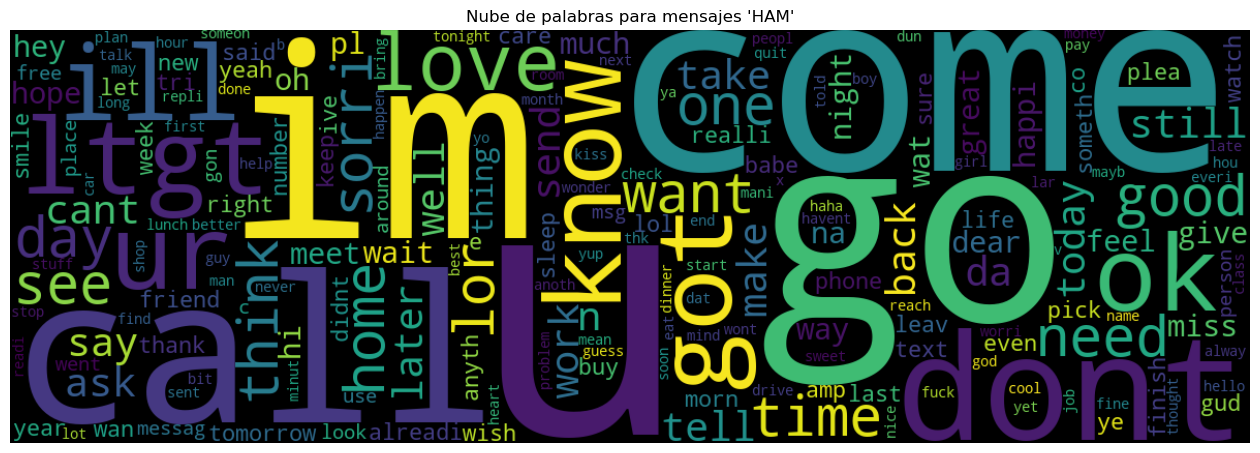

In [85]:
# Hacemos una nube de palabras mas comunes
wordcloud = WordCloud(
    width=1200, 
    height=400, 
    background_color='black'
    ).generate(" ".join([word for word, _ in common_ham_words.most_common(500)]))

# Display the generated image:
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras para mensajes 'HAM'")
plt.show()

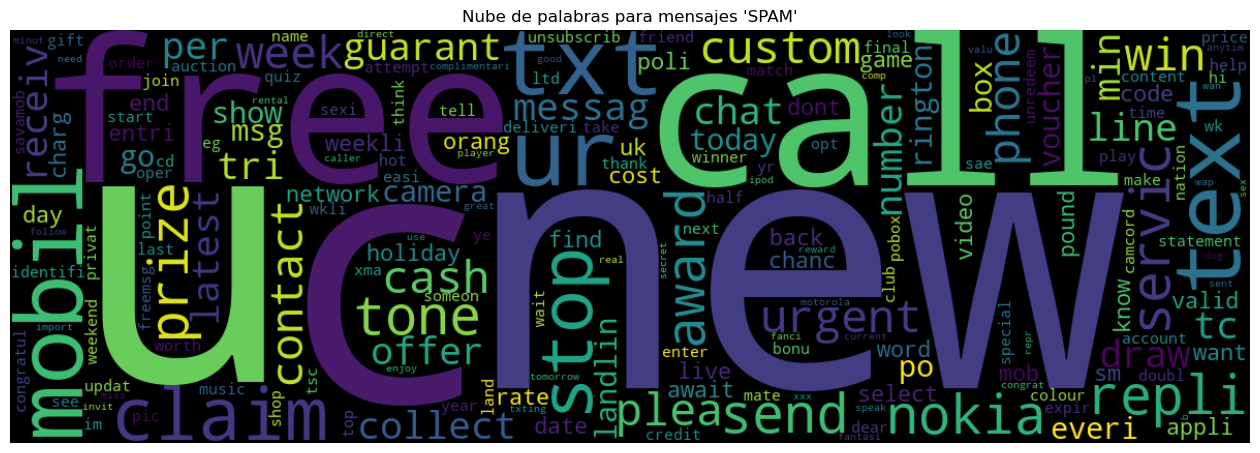

In [86]:
# Hacemos una nube de palabras mas comunes
wordcloud = WordCloud(
    width=1200, 
    height=400, 
    background_color='black'
    ).generate(" ".join([word for word, _ in common_spam_words.most_common(500)]))
# Display the generated image:
plt.figure(figsize=(16, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras para mensajes 'SPAM'")
plt.show()

### ¿Cual es la probabilidad de que una palabra indique que un msg sea Spam o no?


Para realizar el caluclo de la probabilidad que existe de que una palabra pertenesca a un mensaje de *spam*. No podemos utilizar la tipica probabilidad de laplace $\text(P)=\frac{\text{Casos Favorables}}{Casos Posibles}$ ya que estanos hablando de dos conjuntos a los cuales puede pertenecer la palabra "ham" y "spam" por ende la probabilidad debe ser calculada mediante el calculo de la **probabilidad condicional** co la siguiente formula:

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}​
$$

donde:

- A= $\text{Spam}$ (el mensaje es spam).
- B=$B = \text{Word}$ (la palabra aparece en el mensaje).
- $A \cap B$ representa que el mensaje es spam **y** contiene la palabra.

Sin embargo, calcular $P(A \cap B)$ y $P(B)$ directamente requiere conocer frecuencias absolutas del universo completo de mensajes, lo cual podría ser complicado porque:

1. Falta de acceso al universo completo
2. Ambigüedad en eventos conjuntos
3. Distribución desequilibrada
    - Nuestro conjunto de datos se encuentra desequilibrado ya que tenemos mas mensajes **ham** que de **spam** y ya que las probabilidades condicionales están dominadas por la clase mas frecuente

Para evitar estas complicaciones, es más práctico usar frecuencias relativas específicas para cada clase (**spam** y **ham**) y luego combinarlas. Esto permite trabajar con datos accesibles y evita la necesidad de calcular explícitamente $P(A \cap B)$ y $P(B)$ del universo completo.

En este caso, hacemos una simplificación basada en los datos disponibles:

$$
P=(\text{Spam} \mid \text{Word} ) = \frac{frecuenciaSpam}{frecuenciaSpam+frecuenciaHam}
$$

!!!!! IMPORTANTE !!!!!

Como se puede observar para clacular la pribabilidad necesitamos la frecuencia de la palabra en ambos conjuntos "ham", "spam" esto trae consigo un gran problema que sino resolvermas la probabilidad sera erronea, Este problema es que existe la probabilidad de que una palabra no exista en ambos conjuntos sino en solamente uno, esto hace que la frecuencia de palabras en spam se divida sobre si misma

Para solucionar esto lo que podemos aplicar es un **Ajunste laplaciano (Suavizado)**. Aplicando el ajuste la formula se representara de la siguiente manera: 

$$
P=(\text{Spam} \mid \text{Word} ) = \frac{frecuenciaSpam + 1}{frecuenciaSpam+frecuenciaHam + 2}
$$

!!! SIN AJUSTE

| Word       | FREQUENCY_HAM | FREQUENCY_SPAM | PROBABILITY |
| ---------- | ------------- | -------------- | ----------- |
| abl        | 26.0          | 0.0            | 0.00000     |
| abt        | 26.0          | 0.0            | 0.00000     |
| ==access== | ==0.0==       | ==8.0==        | ==1.00000== |
| account    | 24.0          | 19.0           | 0.44186     |
| ==activ==  | ==0.0==       | ==7.0==        | ==1.00000== |

!!! CON AJUSTE 


| WORD       | FREQUENCY_HAM | FREQUENCY_SPAM | PROBABILITY  |
| ---------- | ------------- | -------------- | ------------ |
| abl        | 26.0          | 0.0            | 0.035714     |
| abt        | 26.0          | 0.0            | 0.035714     |
| ==access== | ==0.0==       | ==8.0==        | ==0.900000== |
| account    | 24.0          | 19.0           | 0.444444     |
| ==activ==  | ==0.0==       | ==7.0==        | ==0.888889== |

### ¿Cuál es la probabilidad de que una palabra indique que un mensaje sea Spam o no?

Para calcular la probabilidad de que una palabra pertenezca a un mensaje de **spam**, no podemos usar la típica probabilidad de Laplace:  

$$
P = \frac{\text{Casos Favorables}}{\text{Casos Posibles}}
$$  

Esto se debe a que hablamos de dos posibles conjuntos a los que puede pertenecer la palabra: **ham** y **spam**. Por lo tanto, debemos emplear el cálculo de la **probabilidad condicional** mediante la siguiente fórmula:  

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$  

#### Definiciones:
- **A**: El mensaje es spam ($ \text{Spam} $).
- **B**: La palabra aparece en el mensaje ($ \text{Word} $).
- $ P(A \cap B) $: La probabilidad de que el mensaje sea spam **y** contenga la palabra.
- $ P(B) $: La probabilidad de que la palabra aparezca en cualquier mensaje.  

---

### Desafíos del cálculo:
1. **Falta de acceso al universo completo**: No siempre contamos con datos representativos de todos los mensajes posibles.
2. **Ambigüedad en eventos conjuntos**: Puede ser difícil identificar qué mensajes contienen una palabra específica y a qué clase pertenecen.
3. **Distribución desequilibrada**: En nuestro dataset hay más mensajes **ham** que **spam**, lo que podría sesgar las probabilidades hacia la clase mayoritaria.  

---

### Solución práctica:
En lugar de calcular $ P(A \cap B) $ y $ P(B) $ directamente, trabajamos con frecuencias relativas específicas para cada clase (**spam** y **ham**) en el conjunto de datos. Esto nos lleva a una fórmula simplificada:  

$$
P(\text{Spam} \mid \text{Word}) = \frac{\text{frecuenciaSpam}}{\text{frecuenciaSpam} + \text{frecuenciaHam}}
$$  

---

#### Ajuste Laplaciano (Suavizado):
Para evitar problemas cuando una palabra solo aparece en una de las clases (por ejemplo, frecuencia 0 en **ham** o **spam**), aplicamos un **ajuste laplaciano**, que añade un pequeño valor constante para evitar divisiones problemáticas. La fórmula ajustada es:  

$$
P(\text{Spam} \mid \text{Word}) = \frac{\text{frecuenciaSpam} + 1}{\text{frecuenciaSpam} + \text{frecuenciaHam} + 2}
$$  

---

### Resultados:

#### **Sin ajuste Laplaciano:**
| Word       | FREQUENCY_HAM | FREQUENCY_SPAM | PROBABILITY |
| ---------- | ------------- | -------------- | ----------- |
| abl        | 26.0          | 0.0            | 0.00000     |
| abt        | 26.0          | 0.0            | 0.00000     |
| **access** | **0.0**       | **8.0**        | **1.00000** |
| account    | 24.0          | 19.0           | 0.44186     |
| **activ**  | **0.0**       | **7.0**        | **1.00000** |

#### **Con ajuste Laplaciano:**
| Word       | FREQUENCY_HAM | FREQUENCY_SPAM | PROBABILITY  |
| ---------- | ------------- | -------------- | ------------ |
| abl        | 26.0          | 0.0            | 0.035714     |
| abt        | 26.0          | 0.0            | 0.035714     |
| **access** | **0.0**       | **8.0**        | **0.900000** |
| account    | 24.0          | 19.0           | 0.444444     |
| **activ**  | **0.0**       | **7.0**        | **0.888889** |

---

### Importancia:
El ajuste Laplaciano garantiza que las probabilidades sean más robustas frente a la ausencia de datos, evitando resultados extremos (como probabilidades de 0 o 1). Esto mejora la confiabilidad del análisis, especialmente cuando se utiliza en algoritmos de clasificación como Naive Bayes.


In [103]:
## Merge de los conjuntos con sus frecuencias de palabras. Uniendo ambos datasets por la palabra
df_all_words = pd.merge(
    left=df_common_spam, 
    right=df_common_ham, 
    on='WORD', 
    how='left', 
    validate="many_to_many"
    )

# Llenar valores NaN en caso de que una palabra esté en un DataFrame pero no en el otro
df_all_words.fillna(0, inplace=True)

df_all_words = df_all_words.rename(columns={'FREQUENCY_x': 'FREQUENCY_SPAM', 'FREQUENCY_y': 'FREQUENCY_HAM'})

df_all_words.loc[:, 'PROBABILITY'] = df_all_words.apply(
    lambda row: (row['FREQUENCY_SPAM'] + 1) / (row['FREQUENCY_SPAM']  + row['FREQUENCY_HAM'] + 2),
    axis=1
)

df_all_words.sort_values(by='PROBABILITY', ascending=False).head(10)

,WORD,FREQUENCY_SPAM,FREQUENCY_HAM,PROBABILITY
2,txt,163,0.0,0.993939
6,mobil,135,0.0,0.992701
7,claim,115,0.0,0.991453
10,prize,94,0.0,0.989583
12,tone,73,0.0,0.986667
14,servic,72,0.0,0.986486
16,nokia,68,0.0,0.985714
17,award,66,0.0,0.985294
18,urgent,63,0.0,0.984615
20,cash,62,0.0,0.984375


## Modelo de Machine Learning
---

Para aplicar un modelo de machine learning de manera efectiva, es fundamental seguir algunos pasos clave en el proceso. Esto incluye la división de los datos en conjuntos de entrenamiento y prueba, el preprocesamiento adecuado del texto y la conversión del texto limpio en vectores numéricos. 

1. División de los Datos
Es importante dividir el conjunto de datos en dos partes:

   - 80% de los datos serán utilizados para entrenar el modelo.
   - 20% de los datos se utilizarán para probar la efectividad del modelo.

Esta división ayuda a evitar el sobreajuste y garantiza que el modelo tenga capacidad para generalizar.

>Para entrenar nuestro modelo de Machine Learning y poder saber si está funcionando bien, alguien dijo: Separemos el conjunto de datos inicial en 2: conjunto de entrenamiento (train) y conjunto de Pruebas (test). Por lo general se divide haciendo “80-20”. Y se toman muestras aleatorias -no en secuencia, si no, mezclado.


2. Conversión a Vectores Numéricos (TF-IDF)
El modelo de machine learning no puede trabajar directamente con texto. Por lo tanto, necesitamos convertirlo en una representación numérica. Para ello, utilizaremos el algoritmo **TF-IDF (Term Frequency - Inverse Document Frequency)**.

In [105]:
# Divide el dataset en 80% entrenamiento y 20% prueba
train_size = int(spam.shape[0] * 0.80)  # Asegúrate de convertir a entero
test_size = spam.shape[0] - train_size  # El resto será el tamaño de prueba

spam_train = spam.sample(n=train_size, random_state=42)  # Conjunto de entrenamiento
spam_test = spam.drop(spam_train.index)  # El resto será el conjunto de prueba

train_size, test_size

(4457, 1115)

In [106]:
# Función para codificar las categorías
def encode_category(cat):
    return 1 if cat in ["spam", 1] else 0

# Preprocesamiento y vectorización
spam_train['TYPE'] = spam_train['TYPE'].apply(encode_category)

vectorizer = TfidfVectorizer(encoding="latin-1")
tfidf_features = vectorizer.fit_transform(spam_train['CLEAN_MSG'])

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_features, spam_train['TYPE'], stratify=spam_train['TYPE'], test_size=0.2, random_state=42
)


In [107]:
# Modelo Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9517937219730942

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       773
           1       1.00      0.64      0.78       119

    accuracy                           0.95       892
   macro avg       0.97      0.82      0.88       892
weighted avg       0.95      0.95      0.95       892


Confusion Matrix:
 [[773   0]
 [ 43  76]]


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) # El hiperparámetro n_estimators=100 especifica el número de árboles en el bosque.


clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9641255605381166

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       773
           1       1.00      0.73      0.84       119

    accuracy                           0.96       892
   macro avg       0.98      0.87      0.91       892
weighted avg       0.97      0.96      0.96       892


Confusion Matrix:
 [[773   0]
 [ 32  87]]


In [109]:
# Modelo SVM
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9708520179372198

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       773
           1       0.98      0.80      0.88       119

    accuracy                           0.97       892
   macro avg       0.97      0.90      0.93       892
weighted avg       0.97      0.97      0.97       892


Confusion Matrix:
 [[771   2]
 [ 24  95]]


Aunque todos los modelos tienen un buen rendimiento, **SVM** se destaca por su mayor capacidad para detectar mensajes spam correctamente, dado que tiene el mejor recall para la clase spam. Esto es particularmente importante en aplicaciones de clasificación de spam, ya que es preferible capturar la mayoría de los mensajes **spam**, aunque algunos mensajes no spam puedan ser etiquetados incorrectamente como spam (falsos positivos).